In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
import wrangle
import seaborn as sns
import scipy.stats as stats
from sklearn.impute import SimpleImputer
import explore
import math

# acquire
from env import host, user, password
from pydataset import data


# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

#### Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

#### 1.  Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

#### Goals of exploration
- Can we see patterns, find signals in the data?
- What features are driving logerror?
- Are there other features we can construct that have stronger relationships?
- Use Visualization and statistical testing to help answer these questions.
- We want to walk away from exploration with with modeling strategies (feature selection, algorithm selection, evaluation methods, for example).

#### Agenda
- Wrangle data (acquire, prep, summarize, split)
- Identify questions to answer, hypotheses to test.

In [2]:
#. ACQUIRE
df = wrangle.get_zillow_data()

In [3]:
df.head(3)

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,logerror,...,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,0,0.025595,...,NaN,NaN,6.059063e+13,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1,0.055619,...,NaN,NaN,6.111001e+13,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,2,0.005383,...,NaN,NaN,6.059022e+13,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN


In [4]:
# Exploration:

# Investigating patterns and significant differences or patterns within our data that correlates to our desired target
# target in this case is our logerror

# Data Science Pipeline

# Plan
# Acquire
# Prep
# Explore

In [5]:
# compute the mean (logerror) by zipcode and the overall mean (logerror).  Write a loop that will run a t-test
# between the overall mean and the mean for each zip code.  We want to identify the zip codes where the error
# is significantly higher or lower thatn the expected error.

In [6]:
# Ask 5 questions of the data as per the instruction

In [7]:
# Exploration tactics involving:
# Univariate Exploration
# Bivariate Exploration
# Multivariate Exploration
# including but not limited to:
# means testing, proportion testing, correlation metrics, visulaizations

In [8]:
# PREPARE
df = wrangle.handle_missing_values(df, prop_required_column = 1, prop_required_row = 1)

In [9]:
df.columns

Index(['propertylandusetypeid', 'parcelid', 'id', 'logerror',
       'transactiondate', 'id.1', 'bathroomcnt', 'bedroomcnt', 'fips',
       'latitude', 'longitude', 'propertycountylandusecode',
       'rawcensustractandblock', 'regionidcounty', 'roomcnt', 'assessmentyear',
       'propertylandusedesc'],
      dtype='object')

In [13]:
# df = wrangle.remove_outliers(df, [bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet, fips, latitude, longitude, regionidcounty])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 0 to 77579
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   propertylandusetypeid      77381 non-null  float64
 1   parcelid                   77381 non-null  int64  
 2   id                         77381 non-null  int64  
 3   logerror                   77381 non-null  float64
 4   transactiondate            77381 non-null  object 
 5   id.1                       77381 non-null  int64  
 6   bathroomcnt                77381 non-null  float64
 7   bedroomcnt                 77381 non-null  float64
 8   fips                       77381 non-null  float64
 9   latitude                   77381 non-null  float64
 10  longitude                  77381 non-null  float64
 11  propertycountylandusecode  77381 non-null  object 
 12  rawcensustractandblock     77381 non-null  float64
 13  regionidcounty             77381 non-null  flo

In [15]:
# SPLIT
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = explore.train_validate_test(df, 'logerror')

2.  Answer those questions through a mix of statistical tests and visualizations.

In [16]:
# 1.  Distribution of the independent variables

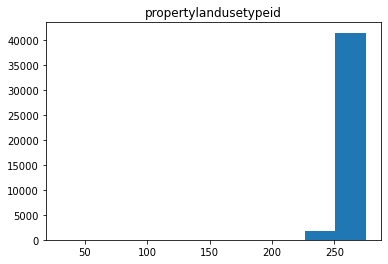

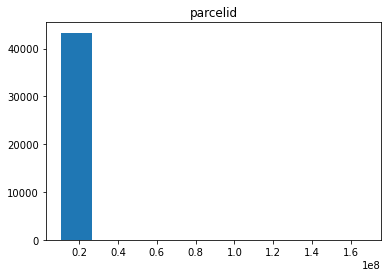

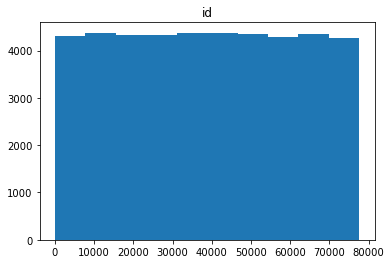

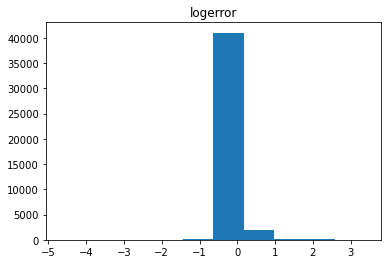

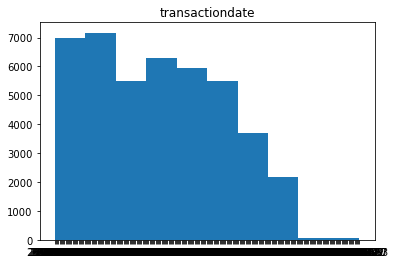

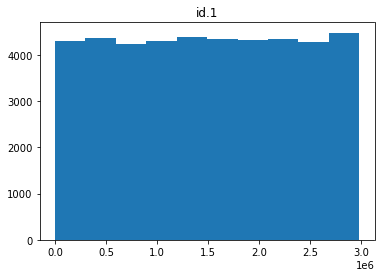

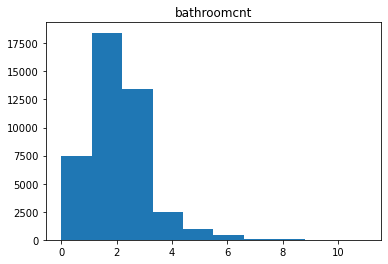

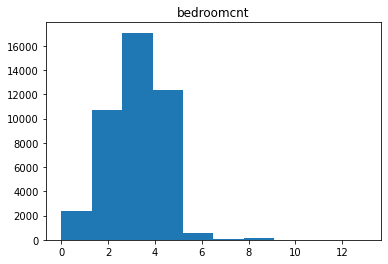

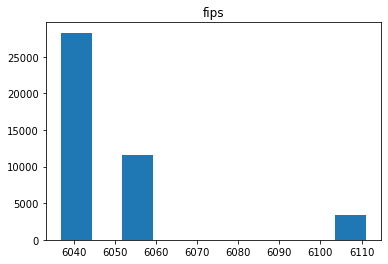

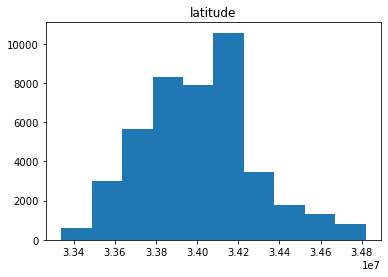

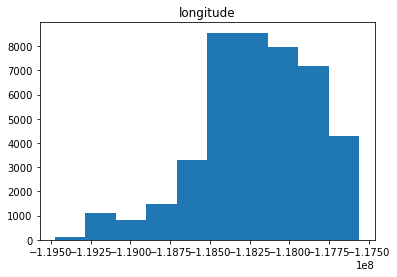

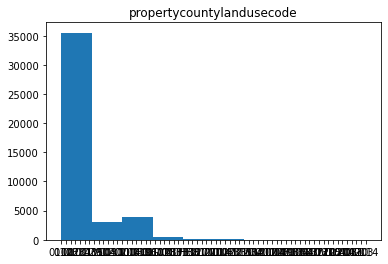

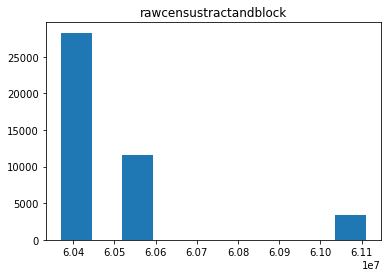

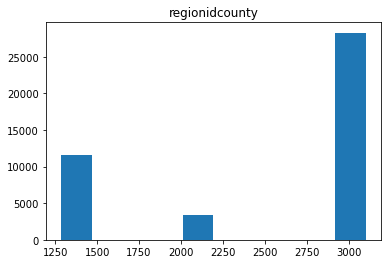

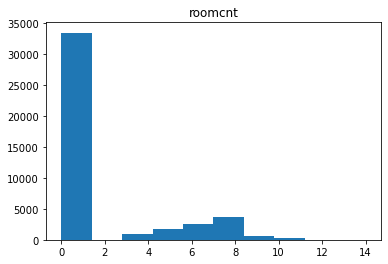

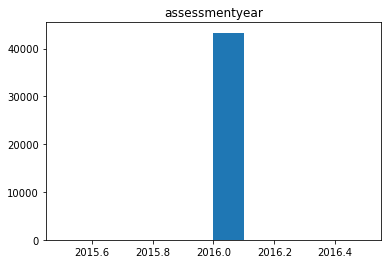

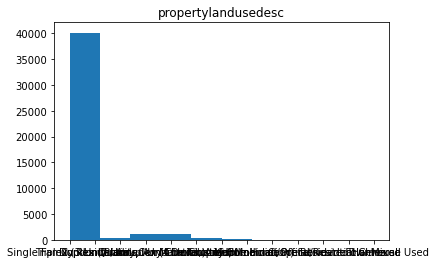

In [17]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [18]:
## Takeaways:

# longitude looks slightly less normally distributed than latitude
# bedroom count looks more normally distributed that bathroom count
# target logerror loods (approx) normal at first glance
# roomcnt looks erroneous

In [19]:
# 2.  Is logerror significantly different across zip codes/counties

In [20]:
train.fips.value_counts()

6037.0    28287
6059.0    11601
6111.0     3444
Name: fips, dtype: int64

In [21]:
# 06111 = Ventura
# 06037 = LA
# 06059 = Orange

In [22]:
train['county'] = train.fips.apply(lambda x : 'orange' if x == 6059.0 else 'los_angeles' if x == 6037.0 else 'ventura')

In [23]:
train.county.value_counts()

los_angeles    28287
orange         11601
ventura         3444
Name: county, dtype: int64

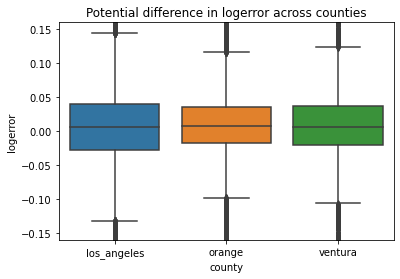

In [24]:
sns.boxplot(train.county, train.logerror)
plt.title('Potential difference in logerror across counties')
plt.ylim(-.16, .16)
plt.show()

In [25]:
# LA county vs Orange County

In [26]:
# presume our target is roughly normal, so we can go about using t-test

In [27]:
# Test for equal variance:
#H0: variance in the logerror in Orange County and Los Angeles are equivalent
# Alpha .05
stats.levene(train[train.county == 'los_angeles'].logerror, train[train.county == 'orange'].logerror)

LeveneResult(statistic=19.673669162034468, pvalue=9.210374790143e-06)

In [28]:
# Reject null hypothesis, proceed with the presumption of inequal variance

In [29]:
# H0" Mean logerror in Orange County is equivalent to mean error in los angeles county

In [30]:
stats.ttest_ind(train[train.county == 'los_angeles'].logerror, train[train.county == 'orange'].logerror, equal_var=False)

Ttest_indResult(statistic=-3.792849604714995, pvalue=0.0001494007188332687)

In [31]:
# Reject the null hypothesis and suggest there is signifivant difference between
# means of logerror between orange and Los Angeles counties

In [32]:
# Takeaway is that there is significance in the county of fips code of the location

In [33]:
# 3.  Is there a relationship between square footage and log error, linear correlation or otherwise?

Relationship between Square footage and Logerror?


ValueError: Could not interpret value `calculatedfinishedsquarefeet` for parameter `x`

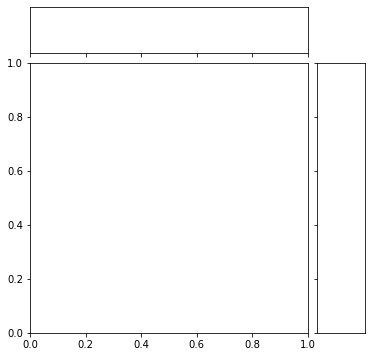

In [34]:
print('Relationship between Square footage and Logerror?')
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train)
plt.xlabel=('Calculated Finished Square Feet')
plt.ylabel('logerror')
plt.show()

In [35]:
# Takeaway:  There appears to be no distinct clusters or linear relationship between square footage and 
# logerror, though the spread of outliers as square footage increases suggests it may be useful going forward
# in multivariate

In [36]:
# 4.  Is there a relationship between longitude and logerror?

Relationship between Longitude and Logerror?


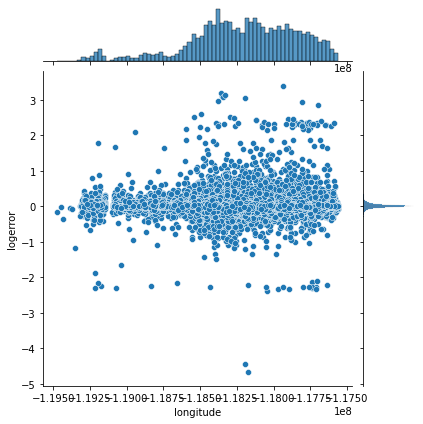

In [37]:
print('Relationship between Longitude and Logerror?')
sns.jointplot(x='longitude', y='logerror', data=train)
plt.xlabel=('Longitude')
plt.ylabel('logerror')
plt.show()

In [38]:
# Bedroom count and logerror?

Relationship between Bedroom count and Logerror?


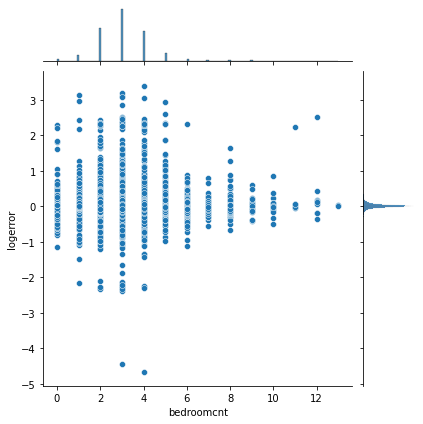

In [39]:
print('Relationship between Bedroom count and Logerror?')
sns.jointplot(x='bedroomcnt', y='logerror', data=train)
plt.xlabel=('Bedroom count')
plt.ylabel('logerror')
plt.show()

In [40]:
# Observation:  There appears to be a division betwee properties with more than 5 bedrooms
# having less error than those with less than 5 bedrooms

In [41]:
# H0: Variance in logerror for homes with 5 or less bedrooms is equivalent to those with more than 5 bdrooms
#
stats.levene(train[train.bedroomcnt > 5].logerror, train[train.bedroomcnt <= 5].logerror)

LeveneResult(statistic=65.47900887878745, pvalue=6.025103524618676e-16)

In [42]:
# presume equal variance, cannot reject null

In [43]:
#  H0:  Mean logerror for homes with 5 or less bedrooms is equivalent to those with more that 5 bedrooms
stats.ttest_ind(train[train.bedroomcnt > 5].logerror, train[train.bedroomcnt <= 5].logerror)

Ttest_indResult(statistic=2.5691134439330243, pvalue=0.010199222398525587)

In [44]:
# Reject the null hypothesis and say that there is significant difference in the mean logerror in homes
# with more than 5 bedrooms compared to those with less than that value

In [45]:
# 5.  Accounting for Bedroom counts, is there a relationship between error and geolocation via long/lat

In [46]:
train['abs_logerr'] = train.logerror.apply(lambda x: x if x >= 0 else -x)

<function matplotlib.pyplot.show(close=None, block=None)>

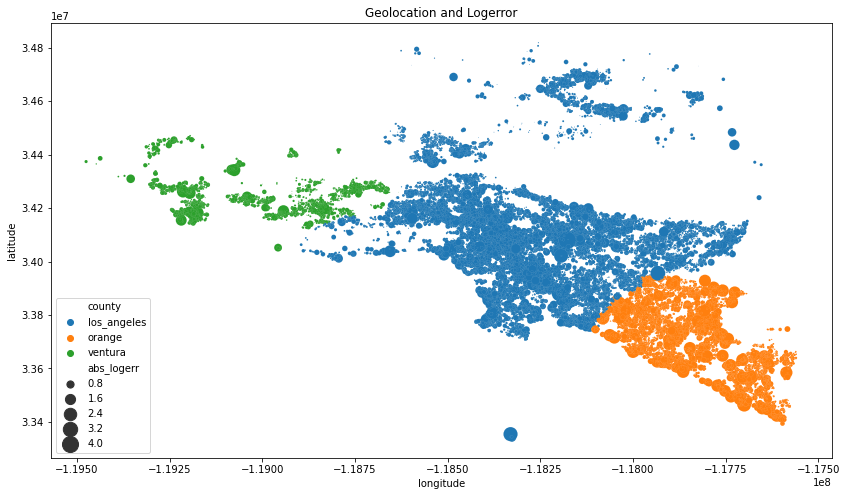

In [47]:
plt.figure(figsize= (14, 8))
sns.scatterplot(x='longitude', y='latitude', hue='county', size='abs_logerr', sizes=(0,300), data=train)
plt.legend()
plt.title('Geolocation and Logerror')
plt.show

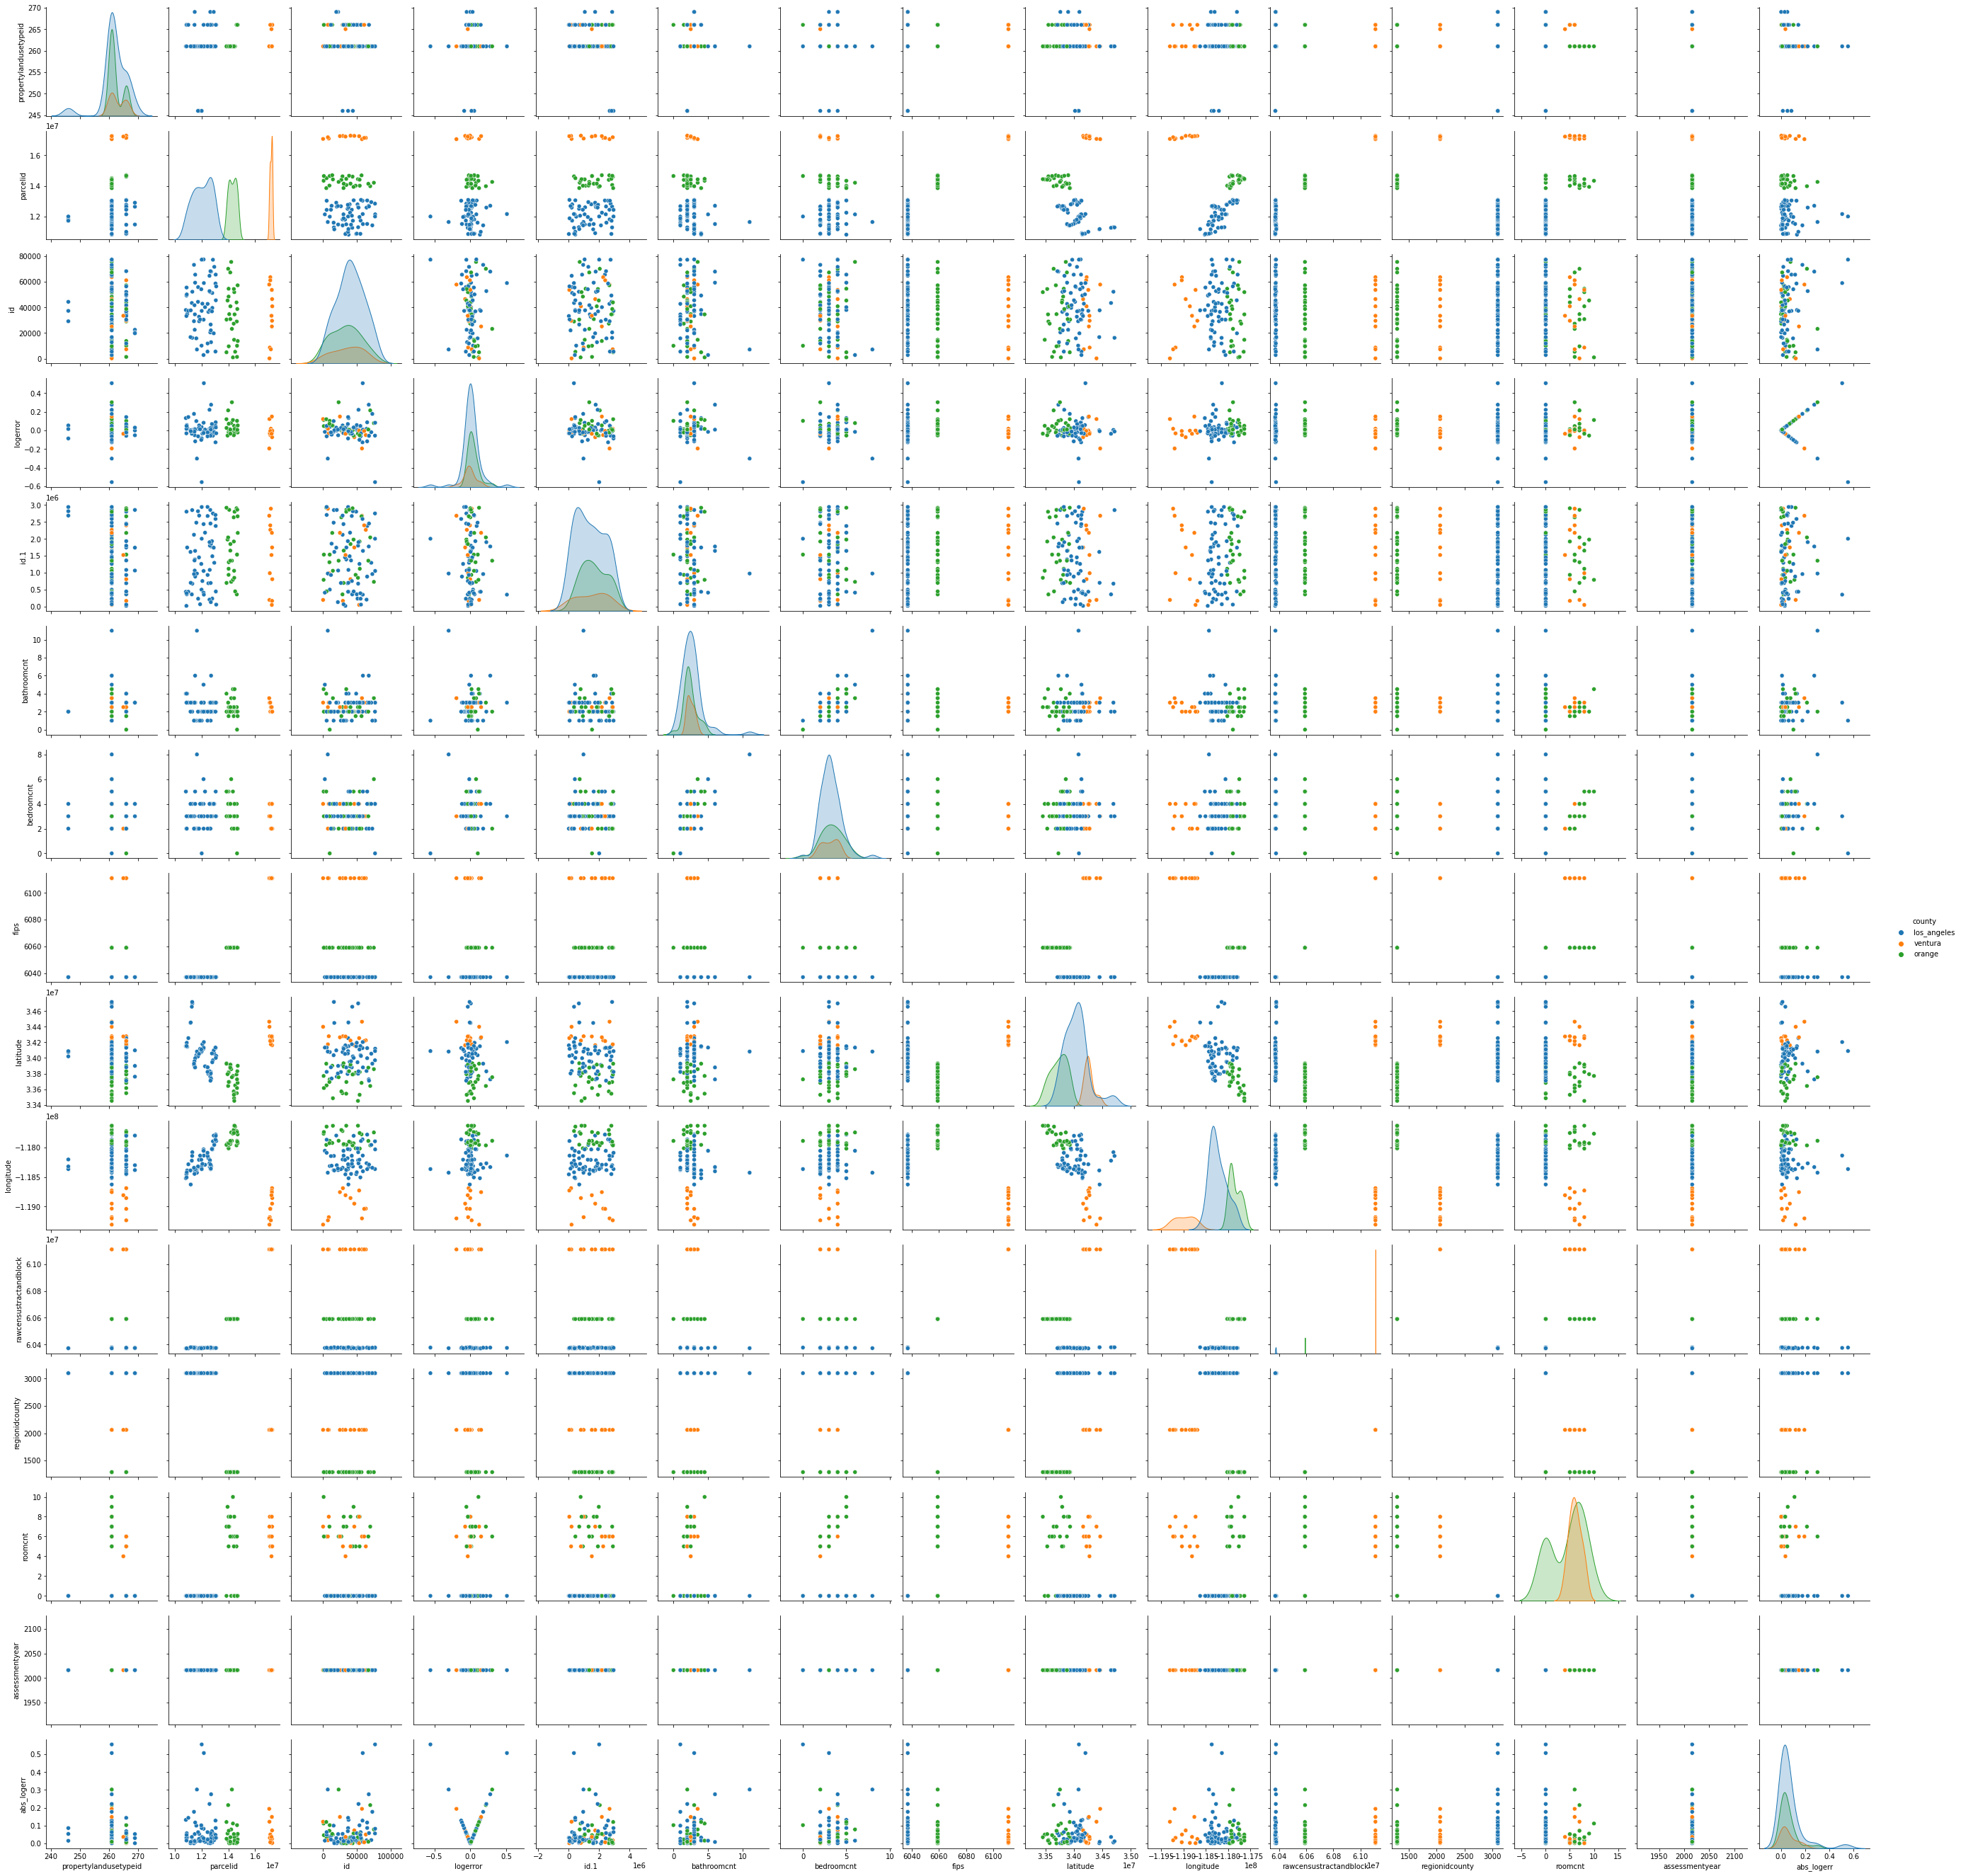

In [49]:
sns.pairplot(train.sample(100), hue='county')

In [50]:
train['bedroom_bin'] = pd.cut(train.bedroomcnt, [0, 4, 10])

In [51]:
train.bedroom_bin.value_counts()

(0, 4]     39441
(4, 10]     3402
Name: bedroom_bin, dtype: int64

In [52]:
train[train.bedroomcnt <= 4].shape

(39913, 20)

In [ ]:
sns.pairplot(train.sample(100), hue='bedroom_bin')

Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [ ]:
fips_with_significantly_different_errors = []
zips = train.county.unique()

In [ ]:
zips

In [ ]:
population_logerror_mean = train.logerror.mean()

In [ ]:
for zipc in zips:
    t, p = stats.ttest_1samp(train[train.county == zip].logerror, population_logerror_mean)
    if p < 0.05:
        fips_with_significantly_different_errors.append(zipc)

In [ ]:
fips_with_significantly_different_errors